<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyControllerEx5_1AutoCruiseCtrl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=92d42548e5a71ca8ae89b31eeea14cf3ee4c082cd68a17bfa00f6cd1f83381c0
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
#add control about the VELOCITY_ERROR of the surface
velocEr = ctrl.Antecedent(np.arange(-20.01,20.01,0.01),'velocEr')

#add control about the ACCELERATION of the surface
accel = ctrl.Antecedent(np.arange(-5.01,5.01,0.01),'accel')

In [4]:
#output is the ENGINE'S FORCE form 0 to 1000, TICK 1
force = ctrl.Consequent(np.arange(0,1001,1),'force')

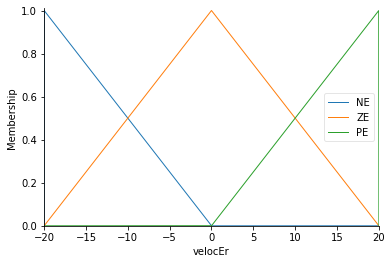

In [7]:
velocEr['NE'] = fuzz.trimf(velocEr.universe,[-20,-20,0]) 
velocEr['ZE'] = fuzz.trimf(velocEr.universe,[-20,0,20]) 
velocEr['PE'] = fuzz.trimf(velocEr.universe,[0,20,20]) 

velocEr.view()

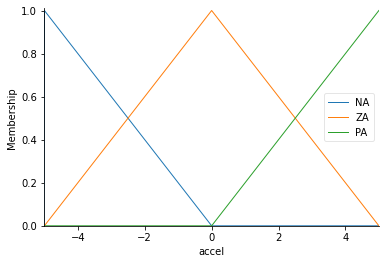

In [8]:
accel['NA'] = fuzz.trimf(accel.universe,[-5,-5,0]) 
accel['ZA'] = fuzz.trimf(accel.universe,[-5,0,5]) 
accel['PA'] = fuzz.trimf(accel.universe,[0,5,5]) 

accel.view()

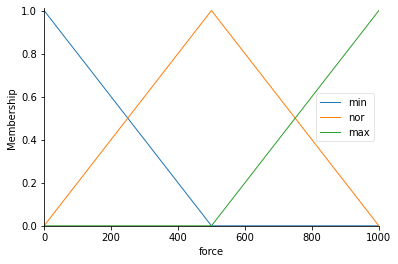

In [9]:
force['min'] = fuzz.trimf(force.universe,[0,0,500]) 
force['nor'] = fuzz.trimf(force.universe,[0,500,1000]) 
force['max'] = fuzz.trimf(force.universe,[500,1000,1000]) 

force.view()

In [10]:
#set rules for controller
rule1=ctrl.Rule(velocEr['NE'] & accel['NA'], force['min'])
rule2=ctrl.Rule(velocEr['NE'] & accel['ZA'], force['min'])
rule3=ctrl.Rule(velocEr['NE'] & accel['PA'], force['min'])

rule4=ctrl.Rule(velocEr['ZE'] & accel['NA'], force['nor'])
rule5=ctrl.Rule(velocEr['ZE'] & accel['ZA'], force['nor'])
rule6=ctrl.Rule(velocEr['ZE'] & accel['PA'], force['nor'])

rule7=ctrl.Rule(velocEr['PE'] & accel['NA'], force['max'])
rule8=ctrl.Rule(velocEr['PE'] & accel['ZA'], force['max'])
rule9=ctrl.Rule(velocEr['PE'] & accel['PA'], force['max'])


In [11]:
#begin training, how many rules much tell
powering_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
powering = ctrl.ControlSystemSimulation(powering_control)

In [12]:
#input for testing
#positive velocity error and positive acceleration expected STRONG power
powering.input['velocEr'] = 12
powering.input['accel'] = 3

587.8048780487702


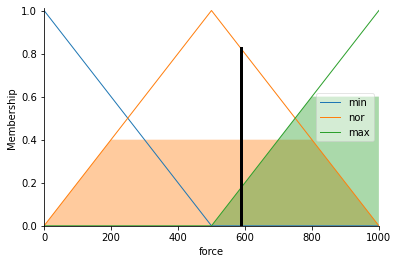

In [14]:
powering.compute()
print(powering.output['force'])
force.view(sim=powering)